In [60]:
import numpy as np
import ctypes
import numba as nb
import time
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt

# Problem 1

In [61]:
a = np.loadtxt('rand_points.txt')
x_c = a[:,0]
y_c = a[:,1]
z_c = a[:,2]

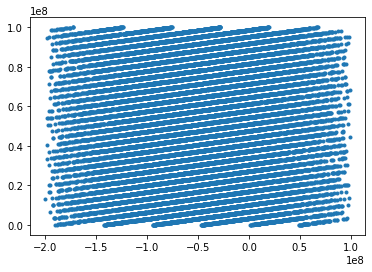

In [68]:
plt.ion()
plt.plot(-2*x_c + 1*y_c, z_c, '.')
plt.show()

It's evident that there is a trend among x, y and z 

In [433]:
# Now move on to the random generator from numpy
num = len(x_c)
x = np.random.rand(num)*10**8
y = np.random.rand(num)*10**8
z = np.random.rand(num)*10**8

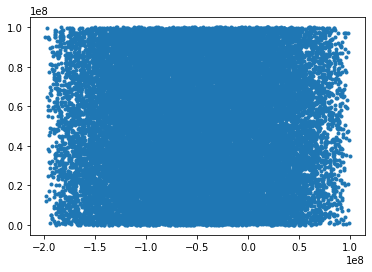

There is no "trend" with the numpy random generator


In [434]:
plt.plot(-2*x+y, z, '.')
plt.show()
print('There is no "trend" with the numpy random generator')

# Problem 2

The power law will capture the essence of an exponential better than a Guassian or Lorentzian. This is due to the fact that the Taylor expansion of power law resembles that of exponential the best. 

In [213]:
def power_law(num, alpha):
    x = np.random.rand(num)
    y = (1-x)**(1/(1+alpha))
    return y

In [347]:
# Power Law generator
num = 100000
alpha = -2
y = power_law(num, alpha)

# We are throwing away 1% of our data to make a nice plot
yy = y[y<10]

In [350]:
# Routine to accept exp
def exp_from_power(x, alpha):
    exp = np.exp(-x)
    power = x**(alpha)
    power = power/power.max()
    accept_prob = exp/power
    accept = np.random.rand(len(accept_prob)) < accept_prob
    assert(np.max(accept_prob)<=1)
    return x[accept]

In [353]:
z = exp_from_power(yy, alpha)

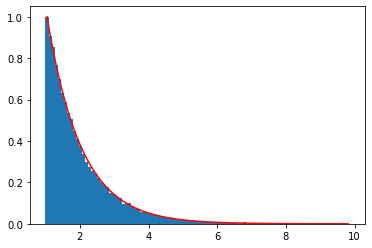

In [354]:
# Exp distribution line on top of the histogram
a, b = np.histogram(z, 100)
bb = 0.5*(b[1:] + b[:-1])
plt.bar(bb, a/a.max(), width = 0.9/bb.max())

pred = np.exp(-bb)
pred = pred/pred.max()
plt.plot(bb, pred, 'r')
plt.show()

In [357]:
print('Accept Fraction was', len(z)/len(yy) * 100, '%')

Accept Fraction was 40.95099842645332 %


# Problem 3

$u < [\exp{(\frac{v}{u})}]^\frac{1}{2}$ \
$ => u < \exp{(\frac{-1}{2}\frac{v}{u})}$ \
$ => ln(u) < \frac{-1}{2}\frac{v}{u}$ \
$ => 2uln(u) > v $ 

In [430]:
num = 10000
u = np.random.rand(num)
v = 0.95*np.random.rand(num)
rat = v/u

# Accepting only the 0<u<exp(-rat)^(-1/2)
accept = u < np.sqrt(np.exp(-rat))
guess = rat[accept]


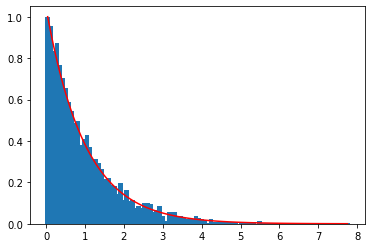

In [431]:
# Plotting histogram and exponential line to show they are the same
a, b = np.histogram(guess, 100)
bb = 0.5*(b[1:] + b[:-1])
plt.bar(bb, a/a.max(), width = 0.9/bb.max())

pred = np.exp(-bb)
pred = pred/pred.max()
plt.plot(bb, pred, 'r')
plt.show()

In [432]:
print('Accept Fraction was', len(guess)/len(rat) * 100, '%')

Accept Fraction was 52.62 %


They indeed are the same